In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, auc

# --- 1. Load and prepare the data ---

In [3]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Convert quality to binary (good/bad) - consider good if quality >= 6
wine_data['quality_binary'] = (wine_data['quality'] >= 6).astype(int)

# Select features and target variable
X = wine_data[['alcohol', 'sulphates', 'volatile acidity']]  # Example features
y = wine_data['quality_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Train the logistic regression model ---

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Get the weights
weights = model.coef_

print(weights) 

[[ 1.0120282   1.60238814 -2.57408967]]


# --- 3. Predict probabilities and evaluate at different thresholds ---

In [ ]:
thresholds = [0.3, 0.5, 0.7]  # Example thresholds

for threshold in thresholds:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"--- Threshold: {threshold} ---")
    print("True Positives:", tp)
    print("False Positives:", fp)
    print("True Negatives:", tn)
    print("False Negatives:", fn)
    print("Accuracy:", accuracy)
    print("-------------------------\n")

# --- 4. Calculate FPR, TPR, and thresholds using roc_curve ---

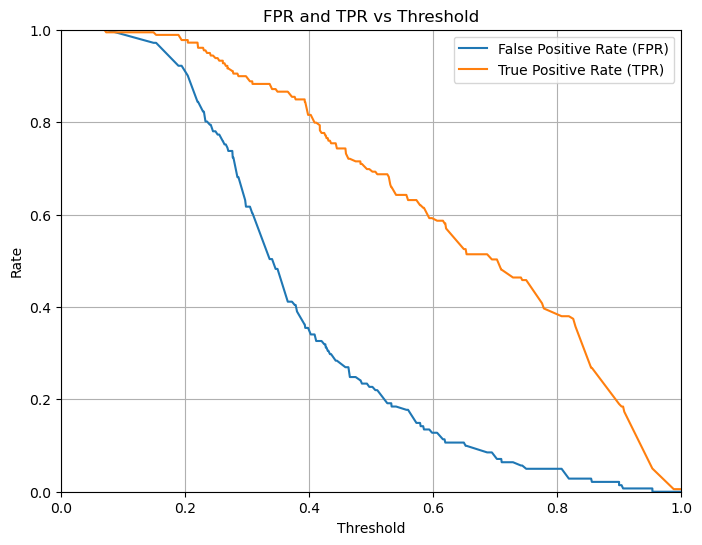

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Plot FPR and TPR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, tpr, label='True Positive Rate (TPR)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FPR and TPR vs Threshold')
plt.legend()
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.grid(True)
plt.show()


# --- 5. Calculate AUC (Area Under the Curve) ---

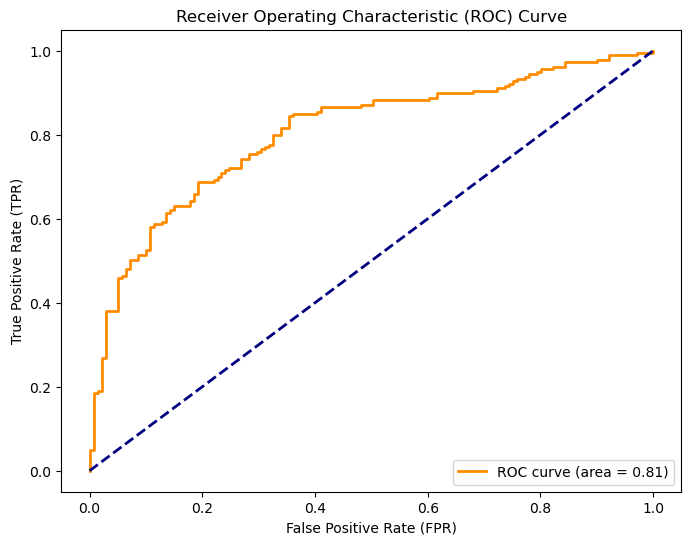

In [9]:
roc_auc = auc(fpr, tpr)
# --- Plot ROC curve (FPR vs TPR) ---

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

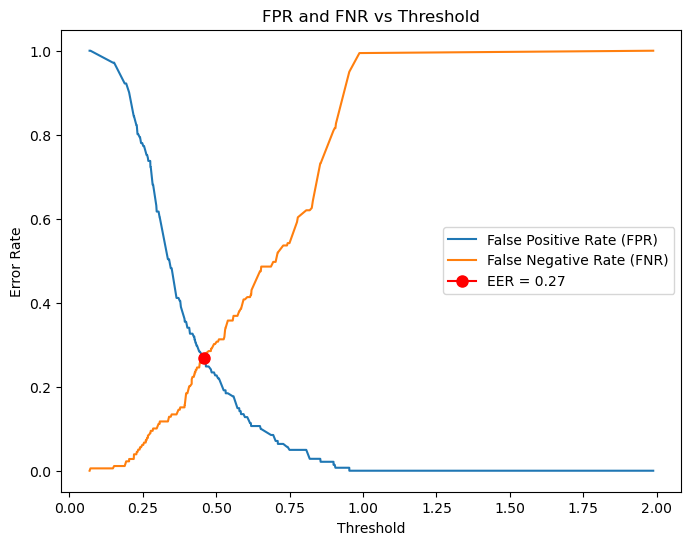

In [13]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Calculate FNR ---
fnr = 1 - tpr

# --- Find the EER (Equal Error Rate) ---
eer_threshold = thresholds[np.argmin(np.abs(fpr - fnr))]
eer = fpr[np.argmin(np.abs(fpr - fnr))]

# --- Plot FPR and FNR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, fnr, label='False Negative Rate (FNR)')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('FPR and FNR vs Threshold')

# Mark the EER point
plt.plot(eer_threshold, eer, marker='o', markersize=8, color="red", label=f'EER = {eer:.2f}')

plt.legend()
plt.show()

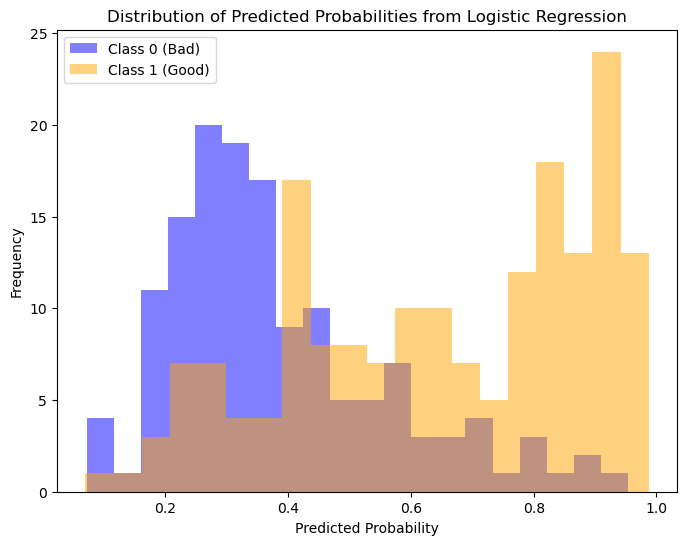

In [14]:
# --- Plot the distribution of predicted probabilities ---

plt.figure(figsize=(8, 6))

# Plot for class 0 (bad quality)
plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.5, label='Class 0 (Bad)')

# Plot for class 1 (good quality)
plt.hist(y_pred_prob[y_test == 1], bins=20, color='orange', alpha=0.5, label='Class 1 (Good)')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities from Logistic Regression')
plt.legend()
plt.show()

#  --- 6. Polynomial Feature

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming you have X_train and y_train

# Create polynomial features
poly = PolynomialFeatures(degree=10)  # Adjust the degree as needed

# Create a pipeline to combine polynomial features and logistic regression
model = Pipeline([
    ('poly', poly),
    ('logistic', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/Users/llyr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
thresholds = [0.3, 0.5, 0.7]  # Example thresholds

for threshold in thresholds:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"--- Threshold: {threshold} ---")
    print("True Positives:", tp)
    print("False Positives:", fp)
    print("True Negatives:", tn)
    print("False Negatives:", fn)
    print("Accuracy:", accuracy)
    print("-------------------------\n")

--- Threshold: 0.3 ---
True Positives: 163
False Positives: 83
True Negatives: 58
False Negatives: 16
Accuracy: 0.690625
-------------------------

--- Threshold: 0.5 ---
True Positives: 122
False Positives: 28
True Negatives: 113
False Negatives: 57
Accuracy: 0.734375
-------------------------

--- Threshold: 0.7 ---
True Positives: 86
False Positives: 11
True Negatives: 130
False Negatives: 93
Accuracy: 0.675
-------------------------



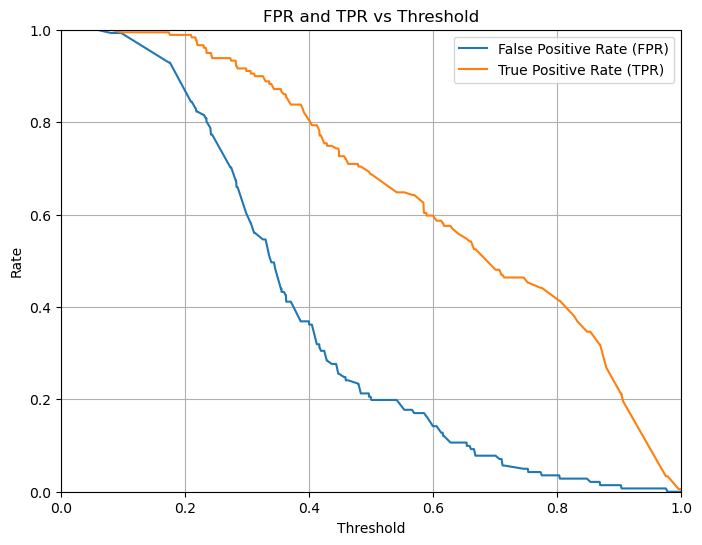

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Plot FPR and TPR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, tpr, label='True Positive Rate (TPR)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FPR and TPR vs Threshold')
plt.legend()
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.grid(True)
plt.show()


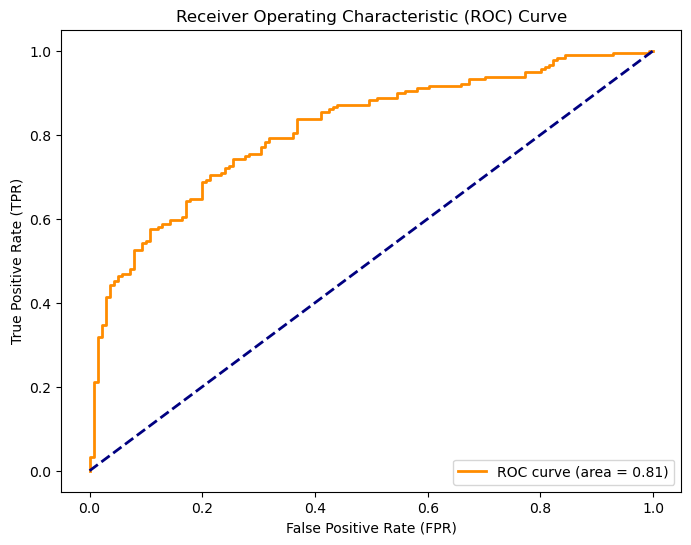

In [10]:
roc_auc = auc(fpr, tpr)
# --- Plot ROC curve (FPR vs TPR) ---

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

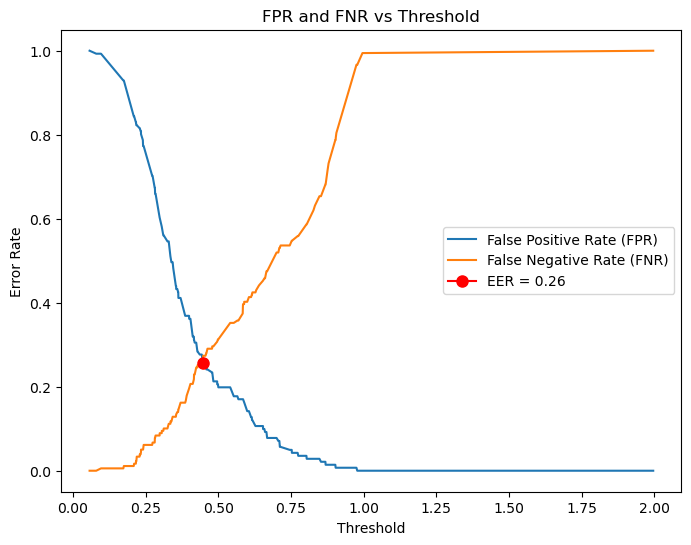

In [11]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Calculate FNR ---
fnr = 1 - tpr

# --- Find the EER (Equal Error Rate) ---
eer_threshold = thresholds[np.argmin(np.abs(fpr - fnr))]
eer = fpr[np.argmin(np.abs(fpr - fnr))]

# --- Plot FPR and FNR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, fnr, label='False Negative Rate (FNR)')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('FPR and FNR vs Threshold')

# Mark the EER point
plt.plot(eer_threshold, eer, marker='o', markersize=8, color="red", label=f'EER = {eer:.2f}')

plt.legend()
plt.show()

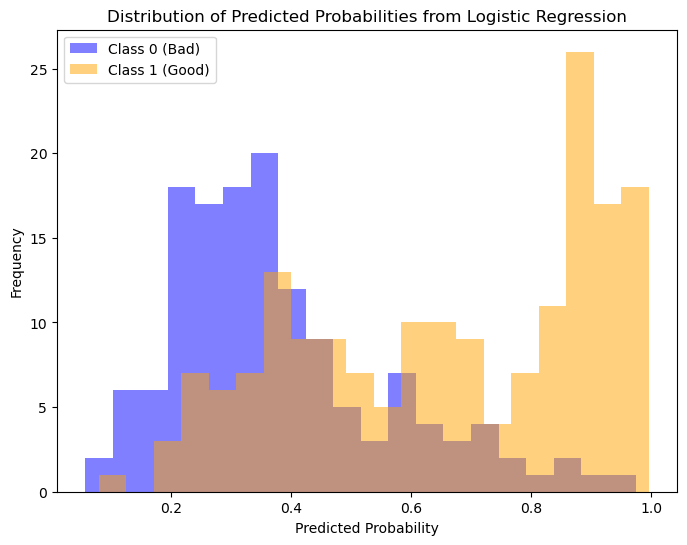

In [16]:
# --- Plot the distribution of predicted probabilities ---

plt.figure(figsize=(8, 6))

# Plot for class 0 (bad quality)
plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.5, label='Class 0 (Bad)')

# Plot for class 1 (good quality)
plt.hist(y_pred_prob[y_test == 1], bins=20, color='orange', alpha=0.5, label='Class 1 (Good)')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities from Logistic Regression')
plt.legend()
plt.show()